# 正則化項

In [56]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/kirenz/datasets/master/Hitters.csv')

In [4]:
df.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.00000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,263.000000
mean,380.928571,101.024845,10.770186,50.909938,48.027950,38.742236,7.444099,2648.68323,717.571429,69.490683,358.795031,330.118012,260.239130,288.937888,106.913043,8.040373,535.925882
std,153.404981,46.454741,8.709037,26.024095,26.166895,21.639327,4.926087,2324.20587,654.472627,86.266061,334.105886,333.219617,267.058085,280.704614,136.854876,6.368359,451.118681
min,16.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.00000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.500000
25%,255.250000,64.000000,4.000000,30.250000,28.000000,22.000000,4.000000,816.75000,209.000000,14.000000,100.250000,88.750000,67.250000,109.250000,7.000000,3.000000,190.000000
50%,379.500000,96.000000,8.000000,48.000000,44.000000,35.000000,6.000000,1928.00000,508.000000,37.500000,247.000000,220.500000,170.500000,212.000000,39.500000,6.000000,425.000000
75%,512.000000,137.000000,16.000000,69.000000,64.750000,53.000000,11.000000,3924.25000,1059.250000,90.000000,526.250000,426.250000,339.250000,325.000000,166.000000,11.000000,750.000000
max,687.000000,238.000000,40.000000,130.000000,121.000000,105.000000,24.000000,14053.00000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1378.000000,492.000000,32.000000,2460.000000


In [5]:
# 欠損値対応
df.dropna(inplace=True)

In [6]:
df.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000
mean,403.642586,107.828897,11.619772,54.745247,51.486692,41.114068,7.311787,2657.543726,722.186312,69.239544,361.220532,330.418251,260.266160,290.711027,118.760456,8.593156,535.925882
std,147.307209,45.125326,8.757108,25.539816,25.882714,21.718056,4.793616,2286.582929,648.199644,82.197581,331.198571,323.367668,264.055868,279.934575,145.080577,6.606574,451.118681
min,19.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.000000,4.000000,0.000000,2.000000,3.000000,1.000000,0.000000,0.000000,0.000000,67.500000
25%,282.500000,71.500000,5.000000,33.500000,30.000000,23.000000,4.000000,842.500000,212.000000,15.000000,105.500000,95.000000,71.000000,113.500000,8.000000,3.000000,190.000000
50%,413.000000,103.000000,9.000000,52.000000,47.000000,37.000000,6.000000,1931.000000,516.000000,40.000000,250.000000,230.000000,174.000000,224.000000,45.000000,7.000000,425.000000
75%,526.000000,141.500000,18.000000,73.000000,71.000000,57.000000,10.000000,3890.500000,1054.000000,92.500000,497.500000,424.500000,328.500000,322.500000,192.000000,13.000000,750.000000
max,687.000000,238.000000,40.000000,130.000000,121.000000,105.000000,24.000000,14053.000000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1377.000000,492.000000,32.000000,2460.000000


In [43]:
# データ準備
y_col = 'Salary'
X = df.loc[:, df.columns!=y_col]
y = df[y_col]
# 標準化のために数値カラムのリストを作成
numeric_cols = X.select_dtypes(include=np.number).columns.to_list()
# ダミー変数を作成は数値カラムのリスト作成の後
X = pd.get_dummies(X, drop_first=True)
# hold-out
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# 標準化
scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])
# モデル学習
model = Ridge()
model.fit(X_train, y_train)
# 予測
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

In [44]:
y_pred

array([ 513.86364069, 1039.78316991,   47.68216176,  580.94220773,
        569.5598426 ,  350.40223621, 1094.79710479,  433.15718067,
       1512.82453879,  835.9120895 ,  529.10609321,  733.85867062,
        410.1404281 ,  667.75129634,  114.98578228,  456.20780504,
        260.32440943,  797.6079581 ,  954.14199904,  261.90899622,
        201.57047425,  365.58786246,  567.86747547,   79.55225117,
        181.12538425,  385.92438271,  722.69151967,  310.2559701 ,
        192.06254157,  554.77237418,  399.18242435,  736.35534388,
        177.08341553,  233.55861173,  550.65241188,  449.55124911,
        579.76821364,  484.44729327, 1442.76040594,  352.5847412 ,
       1264.08333398,  249.50171218,  151.08498754,  333.93158719,
        701.70401843, 1067.54970839,  376.85763797,  576.93783273,
        927.75488323, 1389.37953291,  413.52430318,  721.9797592 ,
        107.19176591,  204.69197885, 1002.57216563, 1197.57391487,
        413.20662555, 1720.56565173,  191.90846069,  709.49434

In [45]:
y_test

166     640.0
249     487.5
294     185.0
9      1100.0
190     202.5
        ...  
45      305.0
119     362.5
139     100.0
291     425.0
312     550.0
Name: Salary, Length: 79, dtype: float64

In [46]:
mse

118513.26135456553

In [47]:
mae

251.01058042384867

In [49]:
model.coef_

array([-255.99352472,  265.41620796,   49.85450911,  -43.4415344 ,
          6.40827279,  126.64463957,  -39.99788141, -180.02267219,
        242.39467113,  -36.09606293,  281.13852012,   46.31799934,
       -164.64027314,   70.88806172,   41.295514  ,  -34.06922615,
         -8.54724705,  -97.91075067,   35.72441367])

In [50]:
X.columns

Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists',
       'Errors', 'League_N', 'Division_W', 'NewLeague_N'],
      dtype='object')

In [52]:
# 線形回帰との比較
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.coef_

array([-269.10981701,  272.90887884,   59.97669544,  -55.37512444,
          3.61504229,  131.08295524,  -14.78202567, -514.20110584,
        550.22369897,  -12.29554582,  299.04286135,    4.60615938,
       -156.78117836,   73.32237801,   54.94973217,  -35.64306984,
          1.59251626,  -95.02251105,   28.46798552])

In [54]:
## 様々なλでのRidge
alphas = np.logspace(-3, 3)
mse_list =[]
coefs = []

for alpha in alphas:
    model = Ridge(alpha)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_list.append(mse)
    coefs.append(model.coef_)

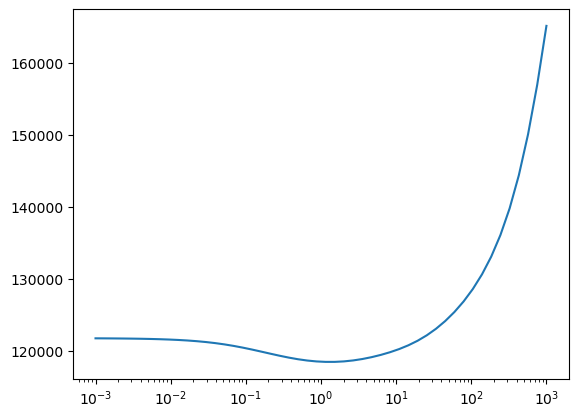

In [57]:
# λ vs MSE
plt.plot(alphas, mse_list)
plt.xscale('log')

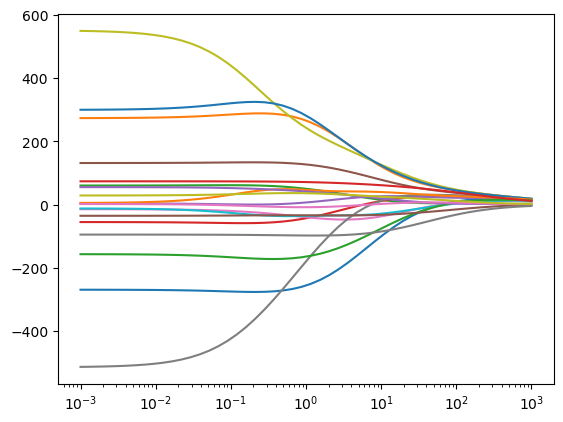

In [58]:
plt.plot(alphas, coefs)
plt.xscale('log')

## Lasso

In [62]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
print(mean_squared_error(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))

117768.9047816135
250.24481877112987


In [63]:
lasso.coef_

array([-263.93470404,  267.52882597,   42.60344047,  -33.86419872,
          7.61638806,  125.23251733,  -29.82564501, -239.24447846,
        330.30504107,   -4.11414372,  259.64536978,    0.        ,
       -160.99905107,   71.08401856,   40.14808014,  -30.18012969,
          0.        ,  -93.87340542,   25.7211037 ])

In [68]:
lr.coef_

array([-269.10981701,  272.90887884,   59.97669544,  -55.37512444,
          3.61504229,  131.08295524,  -14.78202567, -514.20110584,
        550.22369897,  -12.29554582,  299.04286135,    4.60615938,
       -156.78117836,   73.32237801,   54.94973217,  -35.64306984,
          1.59251626,  -95.02251105,   28.46798552])

In [69]:
alphas = np.logspace(-3, 3)
mse_list =[]
coefs = []

for alpha in alphas:
    model = Lasso(alpha)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_list.append(mse)
    coefs.append(model.coef_)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.495e+06, tolerance: 3.232e+03
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.709e+06, tolerance: 3.232e+03
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.991e+06, toleranc

Text(0, 0.5, 'tst MSE')

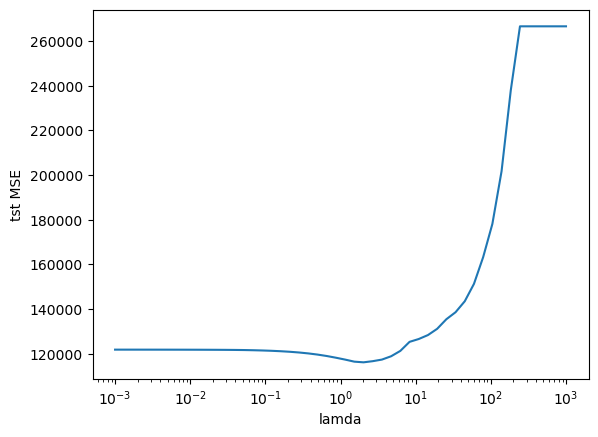

In [75]:
plt.plot(alphas, mse_list)
plt.xscale('log')
plt.xlabel('lamda')
plt.ylabel('tst MSE')

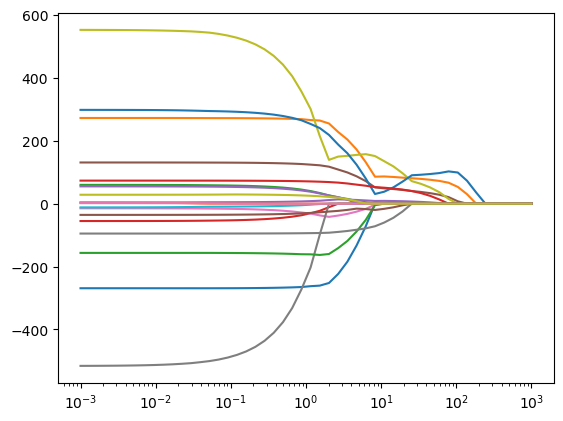

In [78]:
plt.plot(alphas, coefs)
plt.xscale('log')

In [79]:
alphas[np.argmin(mse_list)]

2.023589647725158

In [80]:
np.min(mse_list)

116122.45120731377

In [81]:
lasso = Lasso(alphas[np.argmin(mse_list)])
lasso.fit(X_train, y_train)

Lasso(alpha=2.023589647725158)

In [84]:
pd.DataFrame({'coef': lasso.coef_, 'column_name': X_train.columns.to_list()})

,coef,column_name
0,-252.192228,AtBat
1,254.955174,Hits
2,26.344767,HmRun
3,-11.164490,Runs
4,11.554622,RBI
5,117.619609,Walks
6,-41.936832,Years
7,-0.000000,CAtBat
8,139.314907,CHits
9,-0.000000,CHmRun
